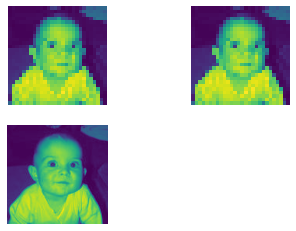

In [1]:
# Read image (two options)
# options to normalize values (0,255 or 0,1)
# force into more than int8
from skimage.io import imread
from skimage.color import rgb2gray
import cv2
import numpy as np

from nc_suite import plot_images

img_cv2 = np.array(cv2.resize(cv2.imread("data/test/3.jpg",0), (28,28)))
img_sk = imread("data/test/3.jpg",0)
img_sk = rgb2gray(img_sk)
img_cv2_2 = img_cv2 / np.max(img_cv2) # always do this for everything else to make sense

imgs = [img_cv2,img_cv2_2,img_sk]
plot_images(imgs)

In [2]:
# try out a few different weightings
# + things like set diagonal to 0 on weights.. or set 0 on laplacian to see which makes differences..
# different laplace calculate methods?
from nc_suite import *
from tqdm import tqdm

def nothing(W):
    return W

def zeroes(W):
    np.fill_diagonal(W,0)
    return W

radii = [1] # 784//4, 10

methods = [manual_weight_abs2] # manual_weights_binary2, weight_int
posts = [zeroes]

outputs = []
for img in imgs:
    for radius in radii:
        temp_out = []
        for method in methods:
            temp_out.append(method(img, radius))
        temp_out.append(intens_posit_wm(img))
        for post in posts:
            for temp in temp_out:
                outputs.append(post(temp))

/Users/garth/Desktop/DDN/nc_suite.py:272: RuntimeWarning: overflow encountered in ubyte_scalars
  W[u][v] = W[v][u] = np.abs(I[u] - I[v]) # Symmetric


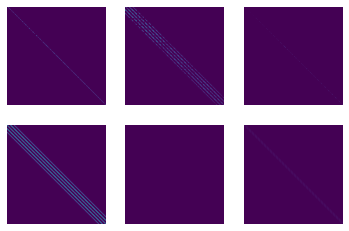

In [3]:
plot_images(outputs)

In [4]:
# cut
# 2-3 different solvers (eig, eigh, something else lobpcg would be nice)
# generalized vs normal? what is not generalized called idk

# calculate D
# calculate L
# compute 2nd smallest eigenvector

# plot outputs :)